In [69]:
DOWNLOAD_ZIP_PATH = r'C:\Users\Sotfvision\Downloads\fashion\fashion'
MODEL_SAVED_PATH = 'FASHION_CLASSIFIER.h5'

# A function to load numpy arrays from the MNIST data files.

    A function that can read MNIST's idx file format into numpy arrays.
    The MNIST data files can be downloaded from here:
    
    http://yann.lecun.com/exdb/mnist/
    This relies on the fact that the MNIST dataset consistently uses
    unsigned char types with their data segments.



In [10]:
import struct

import numpy as np

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Extract the test and train datasets

In [73]:
from os import path

x_train = read_idx(path.join(DOWNLOAD_ZIP_PATH, "train-images-idx3-ubyte"))
y_train = read_idx(path.join(DOWNLOAD_ZIP_PATH, "train-labels-idx1-ubyte"))
x_test  = read_idx(path.join(DOWNLOAD_ZIP_PATH, "t10k-images-idx3-ubyte"))
y_test  = read_idx(path.join(DOWNLOAD_ZIP_PATH, "t10k-labels-idx1-ubyte"))

# Inpects dataset, length and shape

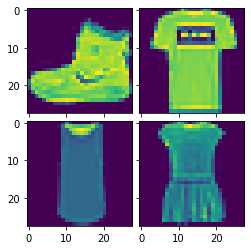

 Length of x_test  = 10000
 Length of y_test  = 10000
 Length of x_train = 60000
 Length of y_train = 60000
 Shape of x_test  = (28, 28)
 Shape of y_test  = (10000,)
 Shape of x_train = (28, 28)
 Shape of y_train = (60000,)



In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Some images from x train

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )



for ax, im in zip(grid, [x_train[0], x_train[1], x_train[2], x_train[3]]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


# Length and shape

print(
" Length of x_test  = " + str(len(x_test)) + '\n',
"Length of y_test  = " + str(len(y_test)) + '\n',
"Length of x_train = " + str(len(x_train)) + '\n',
"Length of y_train = " + str(len(y_train)) + '\n',
"Shape of x_test  = " + str((x_test[0].shape)) + '\n',
"Shape of y_test  = " + str((y_test.shape)) + '\n',
"Shape of x_train = " + str((x_train[0].shape)) + '\n',
"Shape of y_train = " + str((y_train.shape)) + '\n',
)

# Create clean data for the model using the dataset

In [78]:
from keras.utils import np_utils

IMG_ROWS = x_train[0].shape[0]
IMG_COLS = x_train[0].shape[1]

# Reshape to be valid for keras adding the "1" last dimension

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# A tuple of the shape of a single image

INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

# Change our image data type to float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize out data changing range from 0 - 255 to 0 - 1

x_train /= 255
x_test /= 255

# One Hot Encode labels

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Number of classes

CLASSES_NUMBER = y_test.shape[1]

# Create CNN

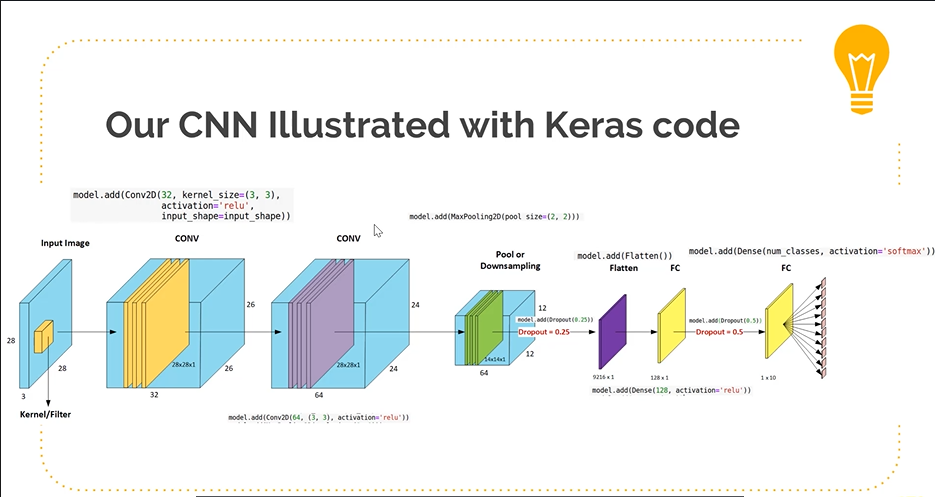

In [79]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()

# First convulation layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE))
# Second convulation layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# First pooling downsampling layer to reduce features to the more important ones
model.add(MaxPooling2D(pool_size=(4, 4)))
# First dropout to ignore no-important weigths
model.add(Dropout(0.25))
# Flat array
model.add(Flatten())
# First Dense Layer 
model.add(Dense(128, activation='relu'))
# Second dropout to ignore no-important weigths
model.add(Dropout(0.25))
# Final Dense layer with softmax to get the probabilities
model.add(Dense(CLASSES_NUMBER, activation='softmax'))
# Use categorical crossentropy, SGD with 0.01 and show metrics
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])
# Show model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

# Train the modal

In [80]:
BATCH_SIZE = 15
EPOCHS = 15
history = model.fit(
    x_train,
    y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = (x_test, y_test)
)

Epoch 1/15
4000/4000 [==============================] - 51s 13ms/step - loss: 1.0812 - accuracy: 0.6005 - val_loss: 0.4843 - val_accuracy: 0.8287
Epoch 2/15
4000/4000 [==============================] - 53s 13ms/step - loss: 0.5064 - accuracy: 0.8111 - val_loss: 0.4109 - val_accuracy: 0.8514
Epoch 3/15
4000/4000 [==============================] - 52s 13ms/step - loss: 0.4392 - accuracy: 0.8372 - val_loss: 0.3908 - val_accuracy: 0.8521
Epoch 4/15
4000/4000 [==============================] - 52s 13ms/step - loss: 0.3975 - accuracy: 0.8501 - val_loss: 0.3476 - val_accuracy: 0.8747
Epoch 5/15
4000/4000 [==============================] - 53s 13ms/step - loss: 0.3712 - accuracy: 0.8643 - val_loss: 0.3319 - val_accuracy: 0.8767
Epoch 6/15
4000/4000 [==============================] - 55s 14ms/step - loss: 0.3515 - accuracy: 0.8693 - val_loss: 0.3240 - val_accuracy: 0.8818
Epoch 7/15
4000/4000 [==============================] - 53s 13ms/step - loss: 0.3398 - accuracy: 0.8746 - val_loss: 0.3077 -

# Show Less and Accuracy

In [81]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test Loss: ", score[0],  " - - - ""Test Accuracy: ", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2655 - accuracy: 0.9004
Test Loss:  0.2655429244041443  - - - Test Accuracy:  0.9003999829292297


# Save Model

In [83]:
model.save(MODEL_SAVED_PATH)

# Using Model

In [100]:
from keras.models import load_model

classifier = load_model(MODEL_SAVED_PATH)

import cv2
import numpy as np

def getLabel(number):
    print(number)
    if number == 0:
        return "T-Shirt/top"
    if number == 1:
        return "Trouser"
    if number == 2:
        return "Pullover"
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "T Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle Boot"
    
def draw_test(name, pred, input_im):
    BLACK = [0, 0, 0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(getLabel(pred)), (102, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2)
    cv2.imshow(name, expanded_image)
    

for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1)
    prediction = np.argmax(model.predict(input_im))
    draw_test("Prediction", prediction, imageL)
    cv2.waitKey(0)
    

cv2.destroyAllWindows()

1
8
1
8
4
6
2
2
9
7


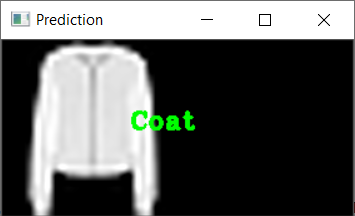